In [1]:
from zipfile import ZipFile
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The `sentiment140` dataset contains 1,600,000 tweets extracted using the twitter api.

The tweets have been annotated *(0 = negative, 4 = positive)* and they can be used to detect sentiment.

It contains the following 6 fields:
- `target`: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- `ids`: The id of the tweet ( 2087)
- `date`: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- `flag`: The query (lyx). If there is no query, then this value is NO_QUERY.
- `user`: the user that tweeted (robotickilldozr)
- `text`: the text of the tweet (Lyx is cool)

In [2]:
source = pathlib.Path(pathlib.Path().absolute(), 'data', 'sentiment140.zip')
source 

PosixPath('/home/jovyan/workspace/OC_AI_07/data/sentiment140.zip')

In [3]:
# Method 2
data = pd.read_csv(source, compression='zip', encoding='cp1252', header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'])

In [4]:
data.shape

(1600000, 6)

In [5]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data = data.astype({"target": bool, "ids": str})

In [7]:
data.describe(exclude='number').T

,count,unique,top,freq
target,1600000,2,False,800000
ids,1600000,1598315,2190457769,2
date,1600000,774363,Mon Jun 15 12:53:14 PDT 2009,20
flag,1600000,1,NO_QUERY,1600000
user,1600000,659775,lost_dog,549
text,1600000,1581466,isPlayer Has Died! Sorry,210


In [8]:
data.head()

,target,ids,date,flag,user,text
0,False,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,False,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,False,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,False,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,False,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
data.target.value_counts()

False    800000
True     800000
Name: target, dtype: int64

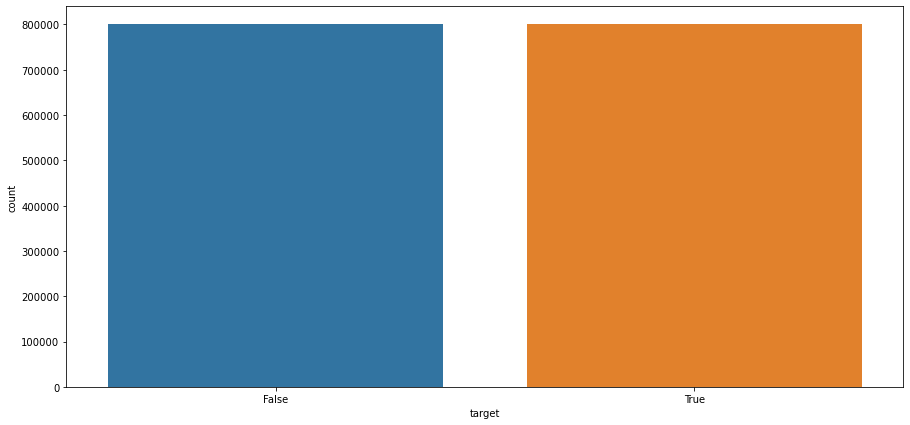

In [10]:
fig = plt.figure(figsize=(15, 7))
sns.barplot(data=data.target.value_counts().reset_index().rename(columns={'target':'count', 'index':'target'}), x='target', y='count')
plt.show()